<a href="https://colab.research.google.com/github/aabelatilaw/COVID-19-Prediction-Using-AI/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
import pandas as pd

# Use the 'raw' URL for the CSV file
url = 'https://raw.githubusercontent.com/aabelatilaw/COVID-19-Prediction-Using-AI/main/covid.csv'

# Load the data into a DataFrame
covid = pd.read_csv(url)

In [4]:
#Having a glance at some of the records
covid.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [5]:
#Looking at the shape
covid.shape

(19496, 32)

In [6]:
covid.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [7]:
#Looking at the different locations
covid["location"].value_counts()

,count
location,
Sweden,146
Canada,146
United States,146
Lithuania,146
Brazil,146
...,...
Yemen,45
Western Sahara,29
Tajikistan,24


In [8]:
#Checking if columns have null values
covid.isna().any()

,0
iso_code,True
location,False
date,False
total_cases,False
new_cases,False
total_deaths,False
new_deaths,False
total_cases_per_million,True
new_cases_per_million,True
total_deaths_per_million,True


In [9]:
#Getting the sum of null values across each column
covid.isna().sum()

,0
iso_code,64
location,0
date,0
total_cases,0
new_cases,0
total_deaths,0
new_deaths,0
total_cases_per_million,377
new_cases_per_million,377
total_deaths_per_million,377


In [10]:
#Getting the cases in Ethiopia
Ethiopia_case=covid[covid["location"]=="Ethiopia"]

In [11]:
Ethiopia_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
5835,ETH,Ethiopia,2020-03-14,1,1,0,0,0.009,0.009,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5836,ETH,Ethiopia,2020-03-15,1,0,0,0,0.009,0.000,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5837,ETH,Ethiopia,2020-03-16,4,3,0,0,0.035,0.026,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5838,ETH,Ethiopia,2020-03-17,5,1,0,0,0.043,0.009,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5839,ETH,Ethiopia,2020-03-18,5,0,0,0,0.043,0.000,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3


In [12]:
Ethiopia_case.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
5902,ETH,Ethiopia,2020-05-20,365,13,5,0,3.175,0.113,0.043,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5903,ETH,Ethiopia,2020-05-21,389,24,5,0,3.384,0.209,0.043,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5904,ETH,Ethiopia,2020-05-22,399,10,5,0,3.471,0.087,0.043,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5905,ETH,Ethiopia,2020-05-23,433,34,5,0,3.766,0.296,0.043,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5906,ETH,Ethiopia,2020-05-24,494,61,5,0,4.297,0.531,0.043,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3


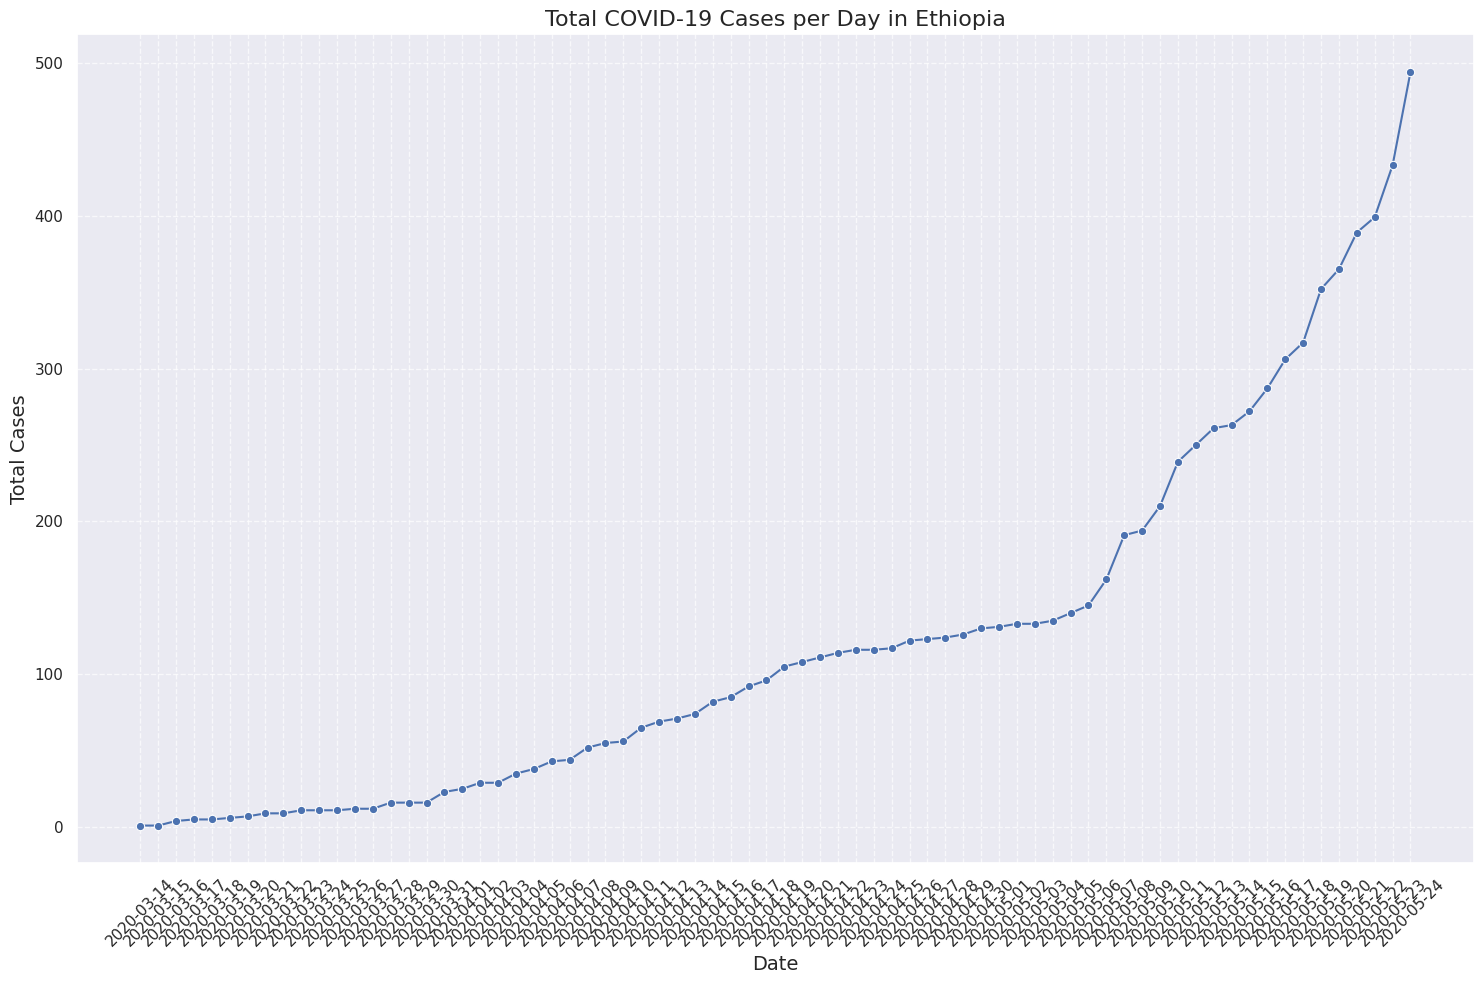

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and create plot
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(x="date", y="total_cases", data=Ethiopia_case, color='b', marker='o')

# Add title, labels, and rotate x-axis
plt.title('Total COVID-19 Cases per Day in Ethiopia', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.xticks(rotation=45)

# Add grid and show plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
#Making a dataframe for last 5 days
Ethiopia_case_5_days=Ethiopia_case.tail()

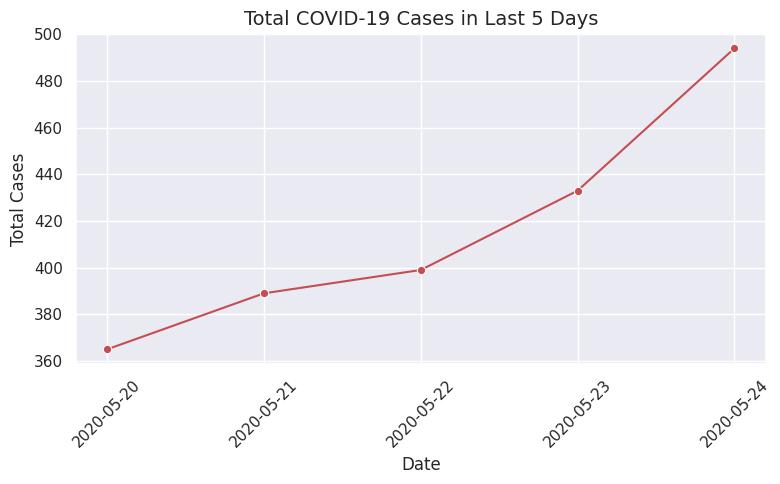

In [21]:
#Total cases in last 5 days
#sns.set(rc={'figure.figsize':(3,3)})
#sns.lineplot(x="date",y="total_cases",data=Ethiopia_case_5_days)
#plt.show()



# Set figure size and create plot
sns.set(rc={'figure.figsize':(8,5)})
sns.lineplot(x="date", y="total_cases", data=Ethiopia_case_5_days, marker='o', color='r')

# Add title and labels
plt.title('Total COVID-19 Cases in Last 5 Days', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)

# Rotate x-axis labels and show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

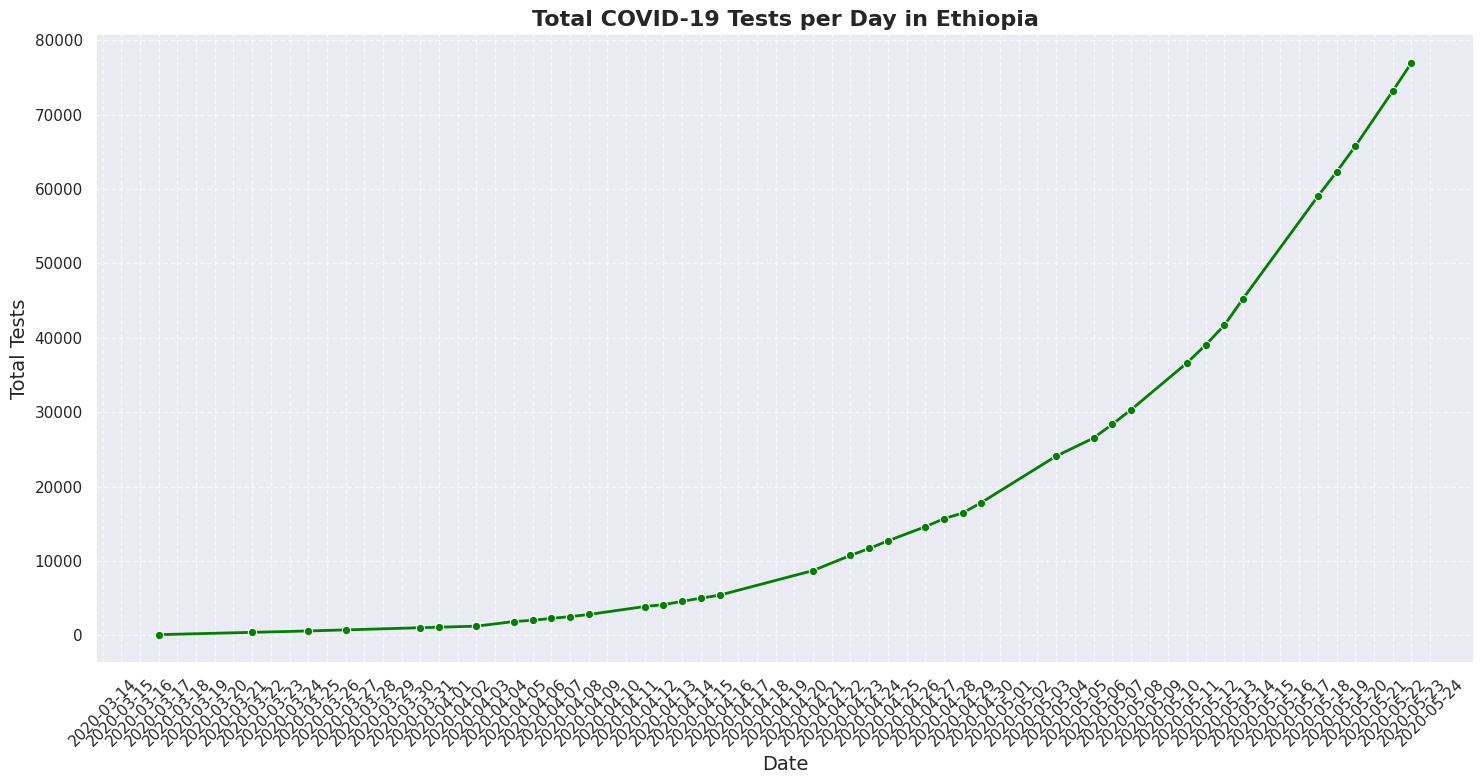

In [22]:
#Total tests per day
#sns.set(rc={'figure.figsize':(15,10)})
#sns.lineplot(x="date",y="total_tests",data=Ethiopia_case)
#plt.show()

# Set figure size and create plot
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x="date", y="total_tests", data=Ethiopia_case, color='green', marker='o', linewidth=2)

# Add title and labels
plt.title('Total COVID-19 Tests per Day in Ethiopia', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Tests', fontsize=14)

# Rotate x-axis labels and add grid
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Improve layout and show plot
plt.tight_layout()
plt.show()

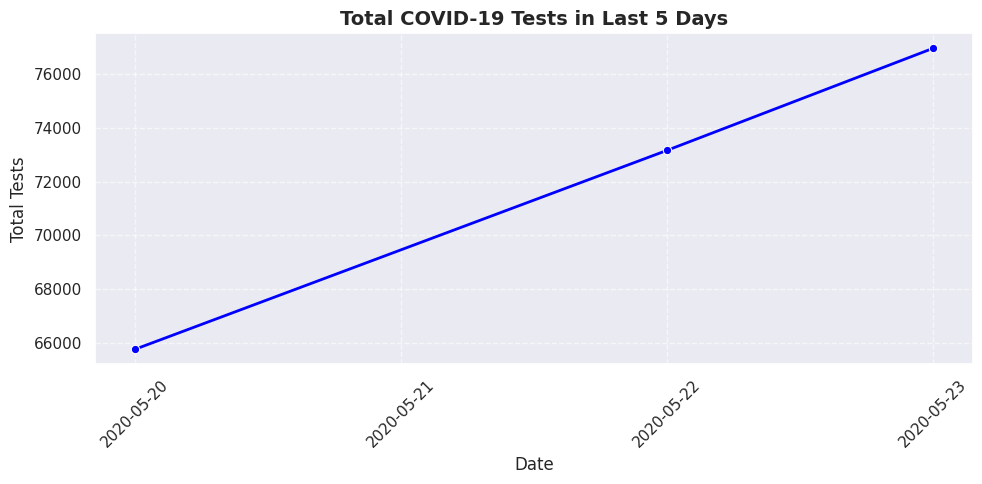

In [32]:
#Total tests in last 5 days
#sns.set(rc={'figure.figsize':(15,10)})
#sns.lineplot(x="date",y="total_tests",data=Ethiopia_case_5_days)
#plt.show()


# Set figure size and create plot
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x="date", y="total_tests", data=Ethiopia_case_5_days, color='blue', marker='o', linewidth=2)

# Add title and labels
plt.title('Total COVID-19 Tests in Last 5 Days', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Tests', fontsize=12)

# Rotate x-axis labels and add grid
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Improve layout and show plot
plt.tight_layout()
plt.show()

In [27]:
#Brazil Case
brazil_case=covid[covid["location"]=="Brazil"]
brazil_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
2510,BRA,Brazil,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2511,BRA,Brazil,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2512,BRA,Brazil,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2513,BRA,Brazil,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2514,BRA,Brazil,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


In [28]:
brazil_case.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
2651,BRA,Brazil,2020-05-20,271628,17408,17971,1179,1277.892,81.897,84.546,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2652,BRA,Brazil,2020-05-21,291579,19951,18859,888,1371.753,93.861,88.723,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2653,BRA,Brazil,2020-05-22,310087,18508,20047,1188,1458.825,87.072,94.312,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2654,BRA,Brazil,2020-05-23,330890,20803,21048,1001,1556.694,97.869,99.022,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


In [29]:
#Making a dataframe for brazil for last 5 days
brazil_last_5_days=brazil_case.tail()

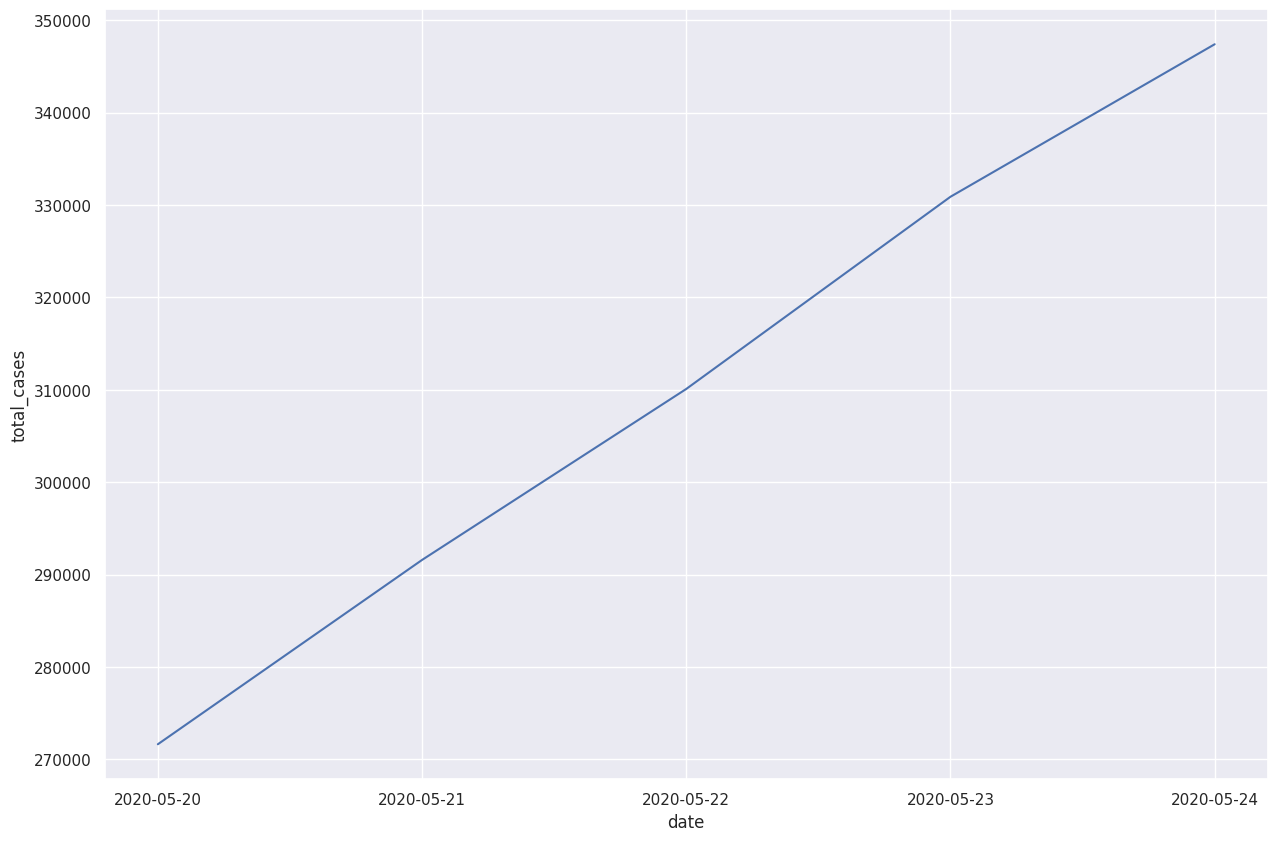

In [30]:
#Total cases in last 5 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()

In [34]:
#Understanding cases of Ethiopia, China and Japan
Ethiopia_japan_china=covid[(covid["location"] =="Ethiopia") | (covid["location"] =="China") | (covid["location"]=="Japan")]

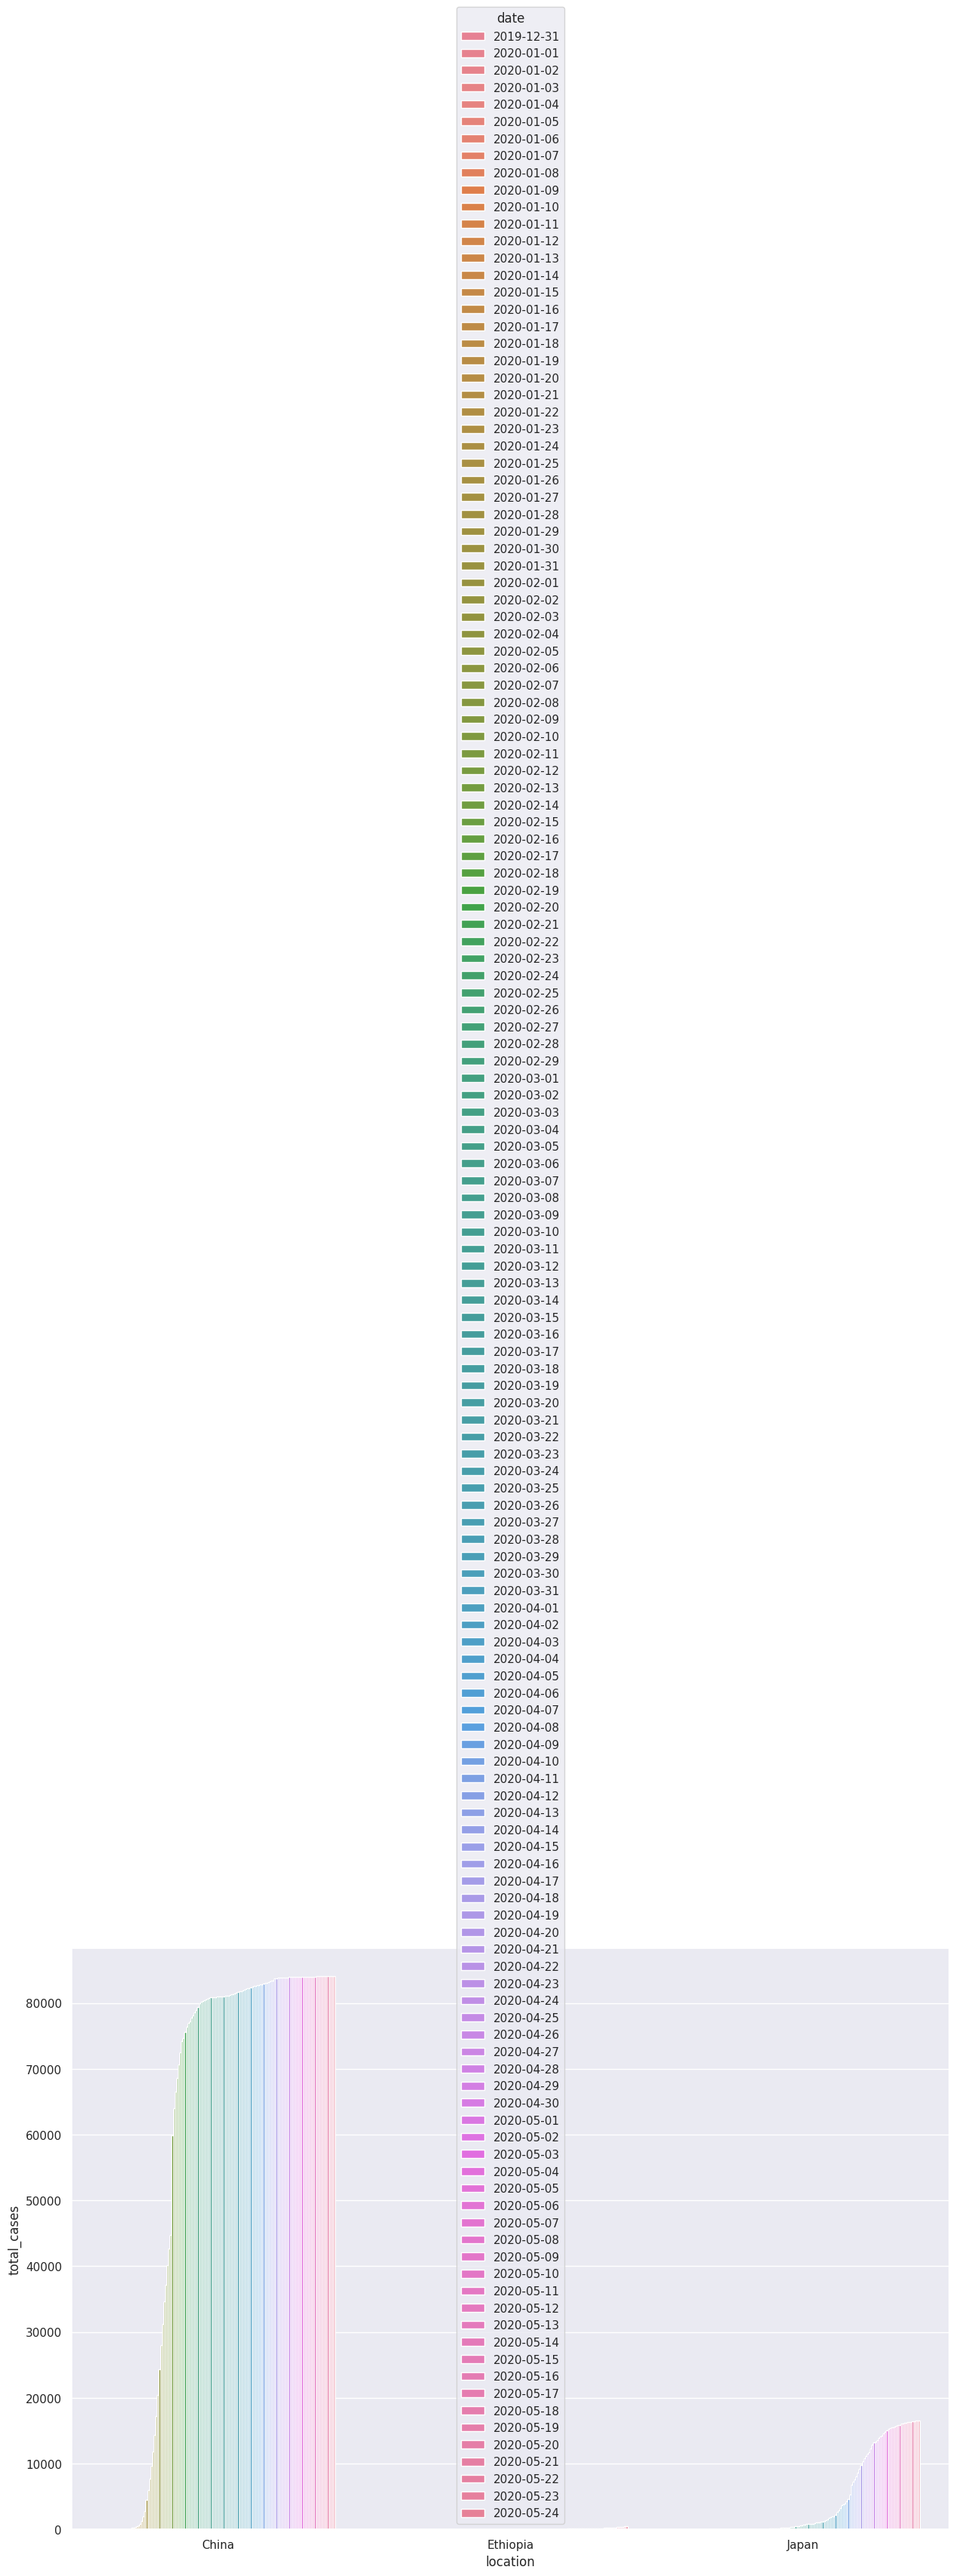

In [38]:
#Plotting growth of cases across China, Ethiopia and Japan
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="location",y="total_cases",data=Ethiopia_japan_china,hue="date")
plt.show()


In [39]:
#Understanding cases of germany and spain
germany_spain=covid[(covid["location"] =="Germany") | (covid["location"] =="Spain")]

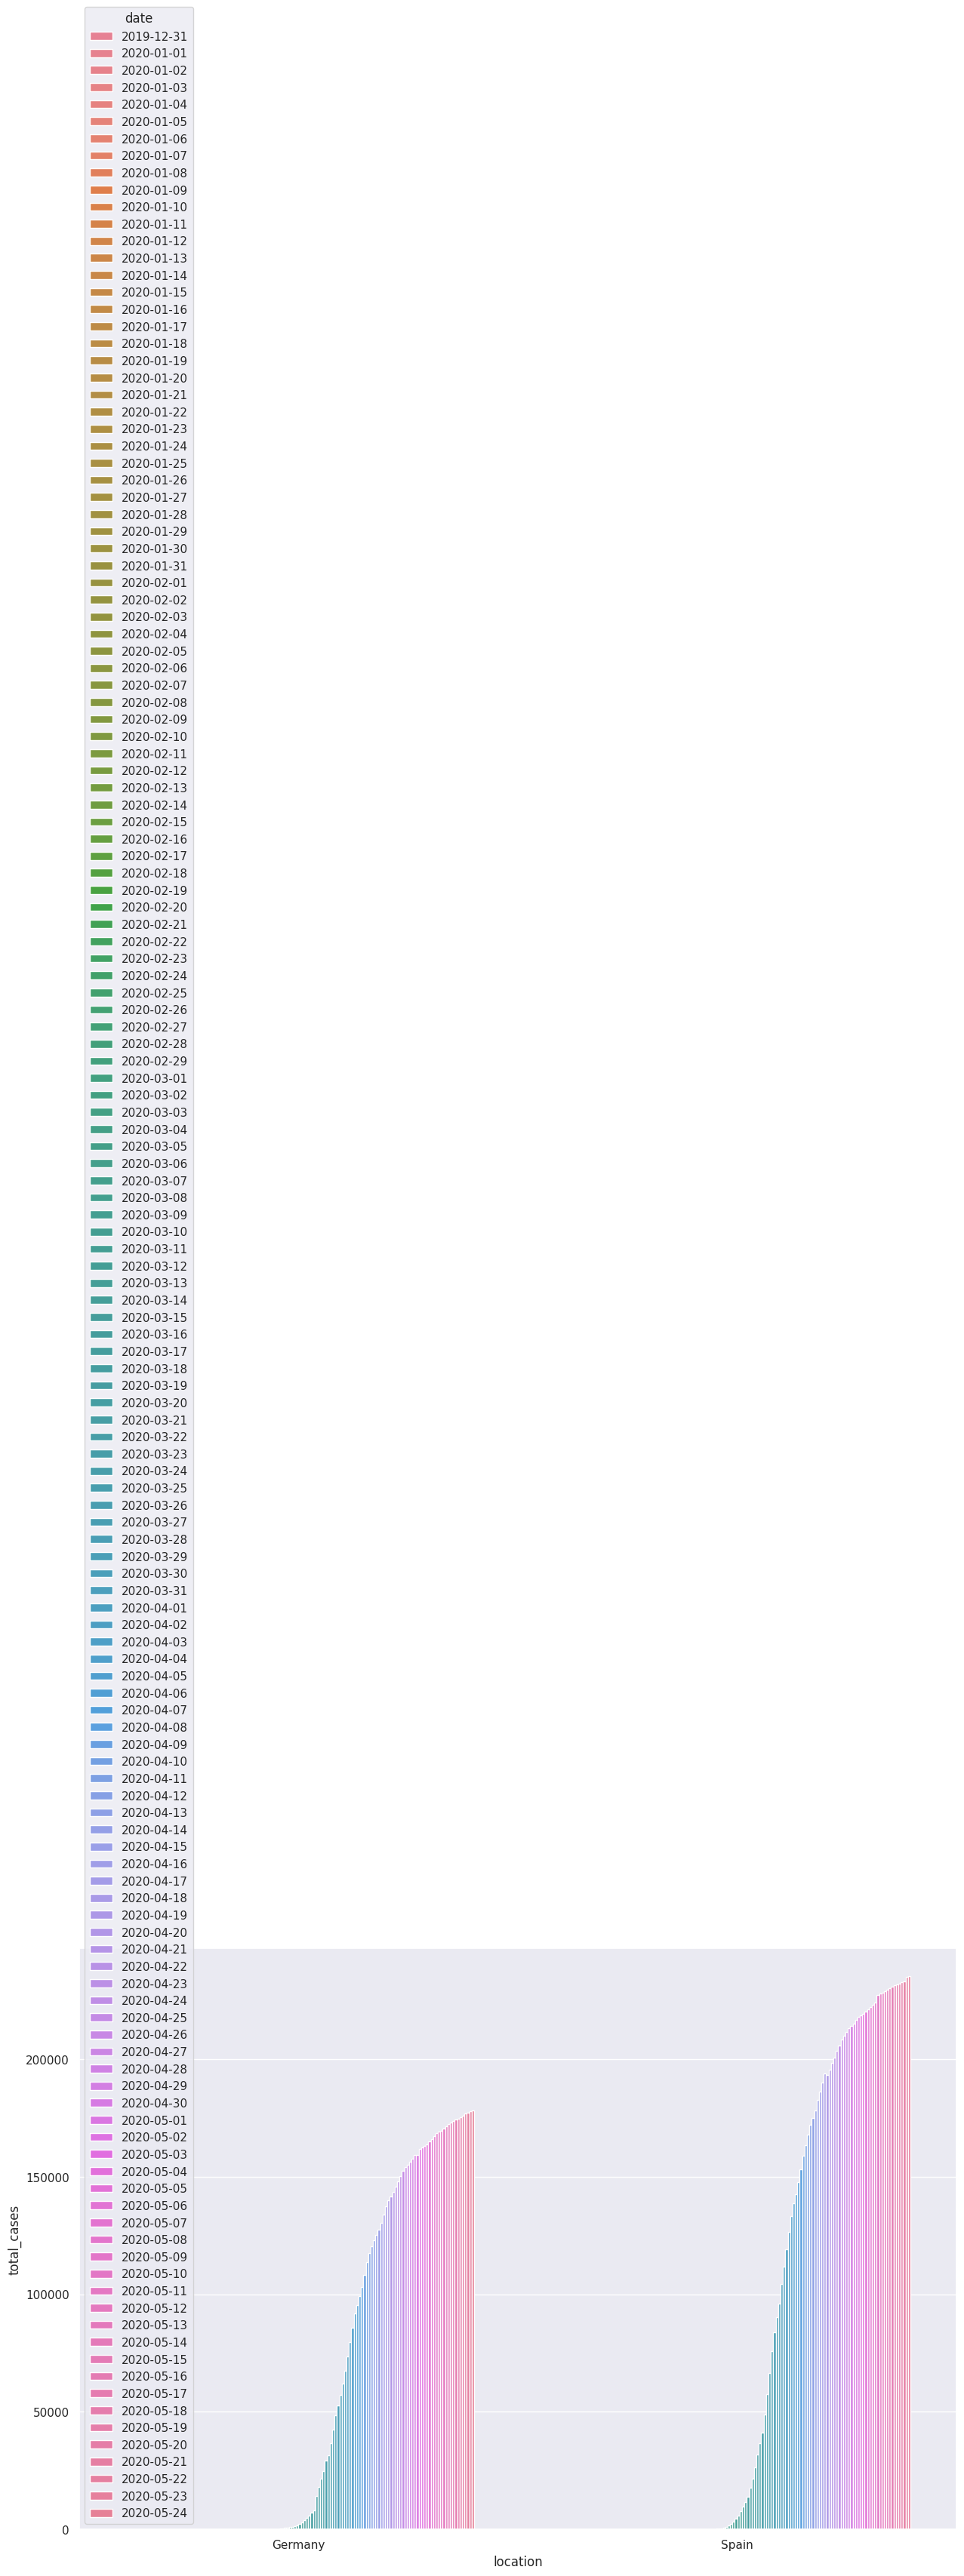

In [40]:
#Plotting growth of cases across Germany and Spain
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="location",y="total_cases",data=germany_spain,hue="date")
plt.show()

In [42]:
#Getting latest data
last_day_cases=covid[covid["date"]=="2020-05-24"]
last_day_cases

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
62,ABW,Aruba,2020-05-24,101,0,3,0,945.994,0.000,28.099,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
198,AFG,Afghanistan,2020-05-24,9998,782,216,11,256.831,20.088,5.549,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500
262,AGO,Angola,2020-05-24,60,0,3,0,1.826,0.000,0.091,...,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN
321,AIA,Anguilla,2020-05-24,3,0,0,0,199.973,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,ALB,Albania,2020-05-24,989,8,31,0,343.665,2.780,10.772,...,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19045,YEM,Yemen,2020-05-24,212,7,39,6,7.108,0.235,1.308,...,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700
19153,ZAF,South Africa,2020-05-24,21343,1218,407,10,359.863,20.537,6.862,...,5.344,3.053,12294.876,18.9,200.380,5.52,8.100,33.200,43.993,2.320
19220,ZMB,Zambia,2020-05-24,920,0,7,0,50.044,0.000,0.381,...,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000
19285,ZWE,Zimbabwe,2020-05-24,56,0,4,0,3.768,0.000,0.269,...,2.822,1.882,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700


In [43]:
#Sorting data w.r.t total_cases
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
19431,OWID_WRL,World,2020-05-24,5273572,97636,341722,3633,676.550,12.526,43.840,...,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18723,VGB,British Virgin Islands,2020-05-24,8,0,1,0,264.577,0.000,33.072,...,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN
1645,BES,Bonaire Sint Eustatius and Saba,2020-05-24,6,0,0,0,228.824,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5543,ESH,Western Sahara,2020-05-24,6,0,0,0,10.045,0.000,0.000,...,NaN,1.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,AIA,Anguilla,2020-05-24,3,0,0,0,199.973,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#Top 5 countries with maximum cases
max_cases_country[1:6]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
4613,DEU,Germany,2020-05-24,178281,431,8247,31,2127.866,5.144,98.432,...,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00


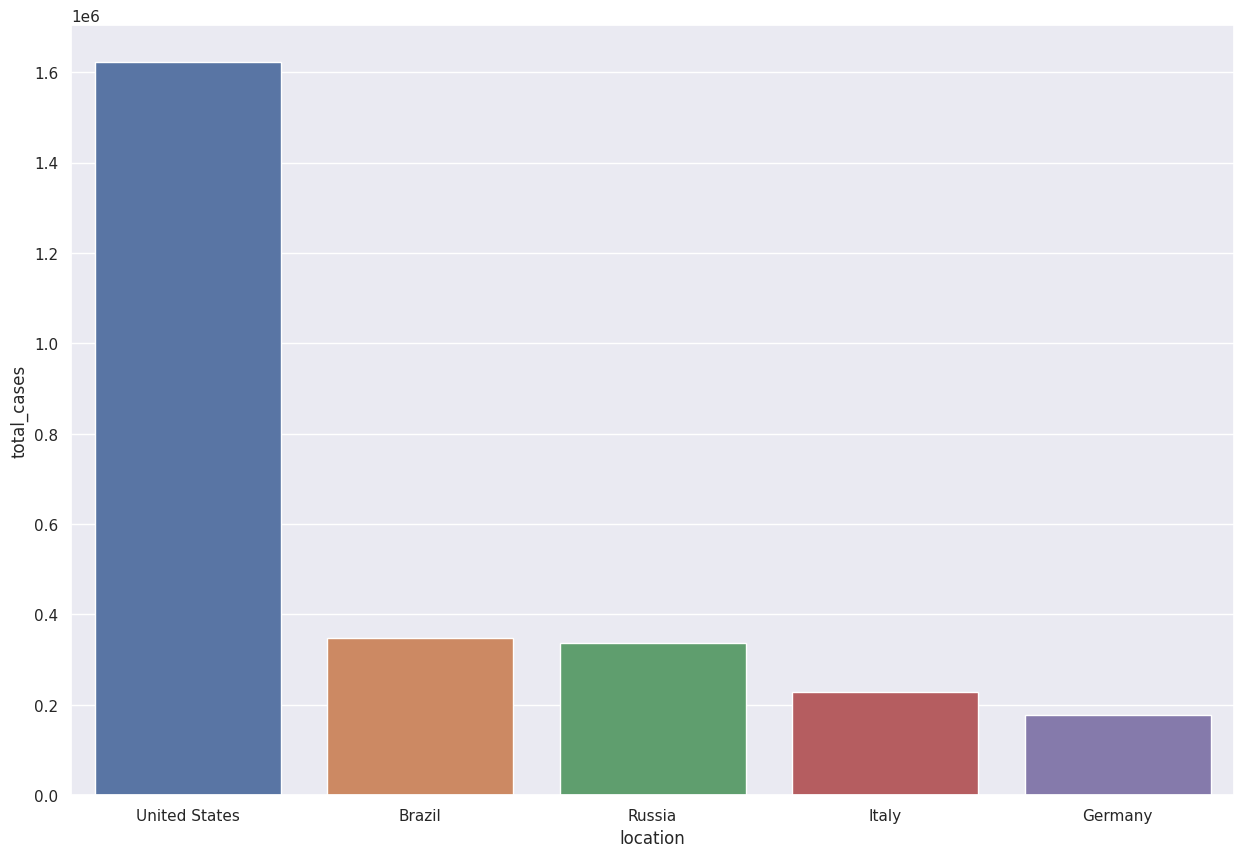

In [45]:
#Making bar-plot for countries with top cases
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="location")
plt.show()

In [46]:
Ethiopia_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
5835,ETH,Ethiopia,2020-03-14,1,1,0,0,0.009,0.009,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5836,ETH,Ethiopia,2020-03-15,1,0,0,0,0.009,0.000,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5837,ETH,Ethiopia,2020-03-16,4,3,0,0,0.035,0.026,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5838,ETH,Ethiopia,2020-03-17,5,1,0,0,0.043,0.009,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5839,ETH,Ethiopia,2020-03-18,5,0,0,0,0.043,0.000,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3


In [47]:
#Linear regression
from sklearn.model_selection import train_test_split

In [48]:
#converting string date to date-time
import datetime as dt
Ethiopia_case['date'] = pd.to_datetime(Ethiopia_case['date'])
Ethiopia_case.head()

<ipython-input-48-4f0c7b94c4d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ethiopia_case['date'] = pd.to_datetime(Ethiopia_case['date'])


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
5835,ETH,Ethiopia,2020-03-14,1,1,0,0,0.009,0.009,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5836,ETH,Ethiopia,2020-03-15,1,0,0,0,0.009,0.000,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5837,ETH,Ethiopia,2020-03-16,4,3,0,0,0.035,0.026,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5838,ETH,Ethiopia,2020-03-17,5,1,0,0,0.043,0.009,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5839,ETH,Ethiopia,2020-03-18,5,0,0,0,0.043,0.000,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3


In [50]:
Ethiopia_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
5835,ETH,Ethiopia,2020-03-14,1,1,0,0,0.009,0.009,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5836,ETH,Ethiopia,2020-03-15,1,0,0,0,0.009,0.000,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5837,ETH,Ethiopia,2020-03-16,4,3,0,0,0.035,0.026,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5838,ETH,Ethiopia,2020-03-17,5,1,0,0,0.043,0.009,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5839,ETH,Ethiopia,2020-03-18,5,0,0,0,0.043,0.000,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3


In [51]:
#converting date-time to ordinal
Ethiopia_case['date']=Ethiopia_case['date'].map(dt.datetime.toordinal)
Ethiopia_case.head()

<ipython-input-51-7b5af0793da2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ethiopia_case['date']=Ethiopia_case['date'].map(dt.datetime.toordinal)


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
5835,ETH,Ethiopia,737498,1,1,0,0,0.009,0.009,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5836,ETH,Ethiopia,737499,1,0,0,0,0.009,0.000,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5837,ETH,Ethiopia,737500,4,3,0,0,0.035,0.026,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5838,ETH,Ethiopia,737501,5,1,0,0,0.043,0.009,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5839,ETH,Ethiopia,737502,5,0,0,0,0.043,0.000,0.0,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3


In [52]:
#getting dependent variable and inpedent variable
x=Ethiopia_case['date']
y=Ethiopia_case['total_cases']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()

In [56]:
import numpy as np
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [57]:
Ethiopia_case.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
5902,ETH,Ethiopia,737565,365,13,5,0,3.175,0.113,0.043,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5903,ETH,Ethiopia,737566,389,24,5,0,3.384,0.209,0.043,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5904,ETH,Ethiopia,737567,399,10,5,0,3.471,0.087,0.043,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5905,ETH,Ethiopia,737568,433,34,5,0,3.766,0.296,0.043,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3
5906,ETH,Ethiopia,737569,494,61,5,0,4.297,0.531,0.043,...,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.96,0.3


In [58]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
mean_squared_error(x_test,y_pred)

543755608195.13654

In [61]:
lr.predict(np.array([[737573]]))

array([[324.65321703]])